MATH 317 Lab Assignment 4   
Dec 1, 2023   
Thomas Cole, 260904382  

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

## **Question 1)**

In this question we implement and examine linear regression using plain gradient descent. We will look at the parameteric error, training loss, testing loss, a contour plot of our gradient descent algorithm, examine the effect of learning rate on our function, examine the effect of initial parameters and finally the effect size of the training data.

#### **Class Definition: Linear Regression with Gradient Descent**

Below we have the decleration of our gradient descent algorithm for linear regression. We will use this to peform the analysis previously mentioned.

In [2]:
class GD_LR:

    def __init__(self,w0,w1,learn_rate,iterations):

        # intialize parameters
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]
        self.iterations = iterations
        self.learn_rate = learn_rate

        # intialize other data
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()
        self.parametric_e = list()

    def loss(self,y,y_pred):
        # using MSE as cost function.
        return np.sum((y - y_pred)**2) / (2*len(y))

    def parmetric_eror(self):

        # calculate of parametric error as Euclidean Distance.
        return np.sqrt((self.w0t - self.w0)**2 + (self.w1t -self.w1)**2)
    
    def fit(self,xs,ys):

        # true value via algebraic solutions
        self.w0t = (len(xs)*np.sum(xs*ys) - np.sum(xs)*np.sum(ys)) / (len(xs)*np.sum(xs**2) - np.sum(xs)**2)
        self.w1t = (np.sum(ys) - self.w0t*(np.sum(xs))) / len(xs)

        # split training and testing data, split 80-20.
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]

        n = len(xs)

        # Compute Gradient Descent
        for i in range(self.iterations):
        
            # predict y-values
            y_pred = self.w0 + self.w1*xs

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
            
            # add parametric error
            self.parametric_e.append(self.parmetric_eror())

            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = (1/n) * np.sum(y_pred - ys)
            w1_deriv = (1/n) * np.sum(xs*(y_pred - ys))
            
            # update values
            self.w0 = self.w0 - self.learn_rate*w0_deriv
            self.w1 = self.w1 - self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

### **Testing**

#### Testing Data

Below we intialize the testing data that will be used through out the section. Please note that I have set the random seed to 1 for consistency in commentary and results.

In [3]:
# helper function
def sample(f,sample_size = 100,seed = 1):
    np.random.seed(seed)
    xs = np.random.uniform(-1,1,sample_size)
    ys = f(xs) + np.random.normal(0,1,sample_size)
    return xs,ys

# target function
def F(x):
    return np.exp(x)

# Sample Values
xs,ys = sample(F,1000,1)

#### Comparison with Exact Parameters

In [4]:
gd = GD_LR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations= 1000)
gd.fit(xs,ys)
print("Estimated w0: " + str(gd.w0) + "\nEstimated w1: " + str(gd.w1))
print("True w0: " + str(gd.w0t) + "\nTrue w1: " + str(gd.w1t))


Estimated w0: 1.2279572894915542
Estimated w1: 1.027366935777479
True w0: 1.1033870677036544
True w1: 1.2214681653201183


The above shows that our gradient descent algorithm has produced values fairly close to the original parameters.

#### **Error Plots**

We now examine the various error plots. To do this, we perform the gradient descent method at varying levels of the learning rate.

In [5]:
# n = 0.9
gdlr09 = GD_LR(0,0,0.9,1000)
gdlr09.fit(xs,ys)

# n = 0.5
gdlr05 = GD_LR(0,0,0.5,1000)
gdlr05.fit(xs,ys)

# n = 0.1
gdlr01 = GD_LR(0,0,0.1,1000)
gdlr01.fit(xs,ys)

# n = 0.05
gdlr005 = GD_LR(0,0,0.05,1000)
gdlr005.fit(xs,ys)

# n = 0.01
gdlr001 = GD_LR(0,0,0.01,1000)
gdlr001.fit(xs,ys)

#### Parametric Error

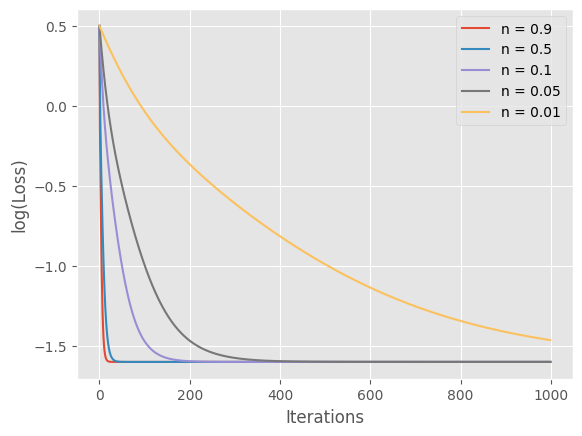

In [6]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.parametric_e), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.parametric_e), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.parametric_e), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.parametric_e), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.parametric_e), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(Loss)")
plt.legend()
plt.show()

#### Training Loss

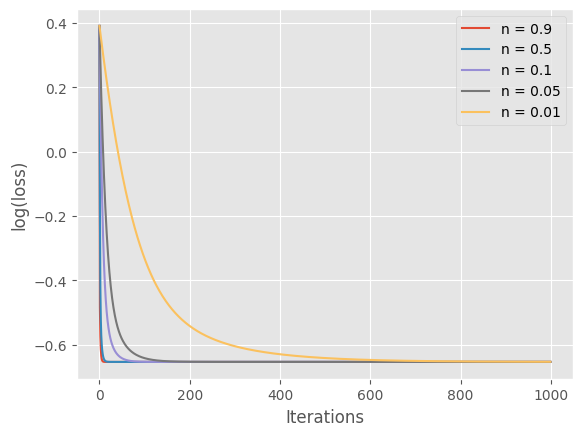

In [7]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.train_loss), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.train_loss), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.train_loss), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.train_loss), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.train_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

#### Test Loss

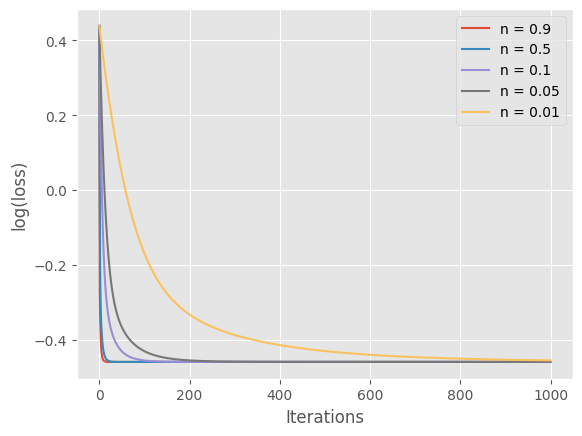

In [8]:
plt.style.use("ggplot")
plt.plot(gdlr09.epochs,np.log(gdlr09.test_loss), label = "n = 0.9")
plt.plot(gdlr05.epochs,np.log(gdlr05.test_loss), label = "n = 0.5")
plt.plot(gdlr01.epochs,np.log(gdlr01.test_loss), label = "n = 0.1")
plt.plot(gdlr005.epochs,np.log(gdlr005.test_loss), label = "n = 0.05")
plt.plot(gdlr001.epochs,np.log(gdlr001.test_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

From the above graphs we can clearly see the effect that the learning rate has on our cost function and ultimately the quality of our regression. More specifically we might suggest that a learning rate of around 0.1 to 0.05 is the best. This is inline with traditional literature as well. Note however, that we only tested this on sample size of 100. We will examine further later, the effect that a changing sample size can have on this decision. 

#### **Contour Plot**

We now examine the effect of initial values on our gradient descent algorithm by plotting the contour plot and our gradient descent path for various intial w0 and w1.

Data

In [9]:
# intialize different starting values
cdg00 = GD_LR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = GD_LR(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg55 = GD_LR(w0 = 5,w1 = 5,learn_rate = 0.01,iterations = 1000)
cdg44 = GD_LR(w0 = -4,w1 = -4,learn_rate = 0.01,iterations = 1000)

# fit regressions
cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*gdlr001.w0,5*gdlr001.w0,100)
w1vals = np.linspace(-5*gdlr001.w1,5*gdlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

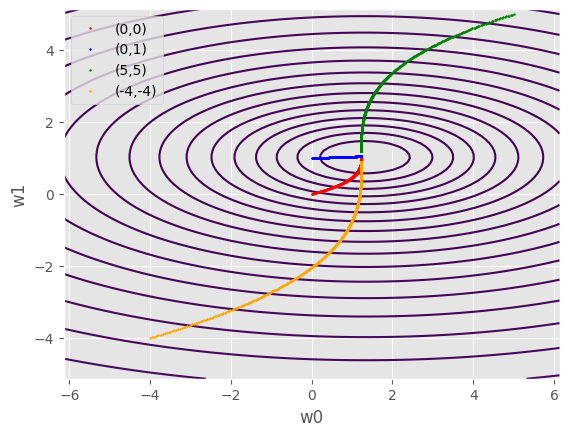

In [10]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "(5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "(-4,-4)")
plt.legend()
plt.show()

From this plot we can see that varying the initial conditions does not greatly affect our gradient descent algorithm. As a result, we might choose to make an educated guess that could be close to the true value, so that we could converge quicker. 

#### **Sample Size Effect**

Finally, we examine the effect of sample size on the quality of our regression. We utilize the previously discovered results, a learning rate of 0.05, and a intial starting conditon of (0,0). We will also use 100 iterations.

In [11]:
xs10,ys10 = sample(F,10)
xs50,ys50 = sample(F,50)
xs100,ys100 = sample(F,100)
xs200,ys200 = sample(F,200)
xs500,ys500 = sample(F,500)

gd10 = GD_LR(0,0,0.1,100)
gd10.fit(xs10,ys10)

gd50 = GD_LR(0,0,0.1,100)
gd50.fit(xs50,ys50)

gd100 = GD_LR(0,0,0.1,100)
gd100.fit(xs100,ys100)

gd200 = GD_LR(0,0,0.1,100)
gd200.fit(xs200,ys200)

gd500 = GD_LR(0,0,0.1,100)
gd500.fit(xs500,ys500)

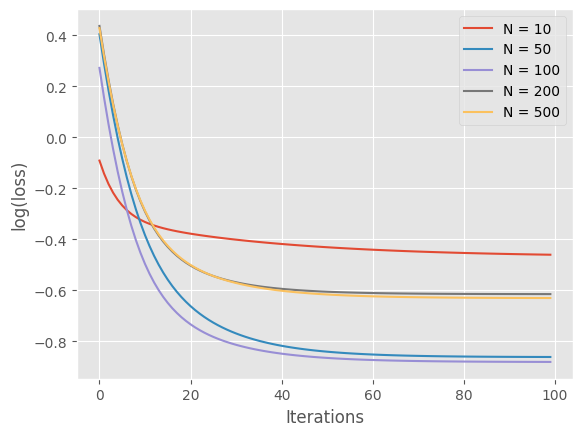

In [12]:
plt.style.use("ggplot")
plt.plot(gd10.epochs,np.log(gd10.train_loss), label = "N = 10")
plt.plot(gd50.epochs,np.log(gd50.train_loss), label = "N = 50")
plt.plot(gd100.epochs,np.log(gd100.train_loss), label = "N = 100")
plt.plot(gd200.epochs,np.log(gd200.train_loss), label = "N = 200")
plt.plot(gd500.epochs,np.log(gd500.train_loss), label = "N = 500")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

From this graph we might gather that we gain very little interms of reduced cost when we expand our sample size beyond 200 as its loss graph is nearly the same as 500. That said, we can also see that the sample sizes of 50 and 100 perform the best, both of which are less than or equal to the number of iterations.

## **Question 2)**

In this question, we perform similar analysis to the above exercise but instead using logistic regression. We will look at training loss, testing loss, a contour plot of our gradient descent algorithm, examine the effect of learning rate on our function, the effect of initial parameters and finally the of effect training data size.

#### **Class Definition: Logistic Regression with Gradient Descent**

Below we have the decleration of our gradient descent algorithm for logistic regression. We will use this to peform the analysis previously mentioned.

In [13]:
class GD_LogR:

    def __init__(self,w0,w1,learn_rate,iterations):

        # intial params
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]
        self.learn_rate = learn_rate
        self.iterations = iterations

        # intialize values
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    
    def loss(self,y,y_pred):
        logPred = np.log(y_pred)
        logOneMinusPred = np.log(1-y_pred)

        return -1/len(y_pred)*np.sum(((y*logPred) + (1-y)*(logOneMinusPred)))
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def fit(self,xs,ys):
           
        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]

        n = len(xs)

        # perform gradient descent
        for i in range(self.iterations):
            
            # predict y-values
            y_pred = self.sigmoid(self.w0 + self.w1*xs)
            y_test_pred = self.sigmoid(self.w0 + self.w1*xs_test)
            
            # calculate loss
            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,y_test_pred)
            self.test_loss.append(cost)

            self.epochs.append(i)

            # calculate gradients
            w0_deriv = (1/n) * np.sum(y_pred - ys)
            w1_deriv = (1/n) * np.sum(xs*(y_pred - ys))

            # update parameters
            self.w0 = self.w0 - self.learn_rate*w0_deriv
            self.w1 = self.w1 - self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

### **Testing**

#### Testing Data

Below we intialize the testing data that will be used throughout the section. Please note that I have set the random seed to 1 for consistency in commentary and results.

In [14]:
# target function
def F(x): 
    return (x + np.abs(x)) / (2*x)

# Sample Values
xs,ys = sample(F,1000,1)

#### **Error Plots**

We now examine the various error plots. To do this, we perform the gradient descent method at varying levels of the learning rate.

In [15]:
# n = 0.9
gdlogr09 = GD_LogR(0,0,0.9,1000)
gdlogr09.fit(xs,ys)

# n = 0.5
gdlogr05 = GD_LogR(0,0,0.5,1000)
gdlogr05.fit(xs,ys)

# n = 0.1
gdlogr01 = GD_LogR(0,0,0.1,1000)
gdlogr01.fit(xs,ys)

# n = 0.05
gdlogr005 = GD_LogR(0,0,0.05,1000)
gdlogr005.fit(xs,ys)

# n = 0.01
gdlogr001 = GD_LogR(0,0,0.01,1000)
gdlogr001.fit(xs,ys)

#### Training Loss

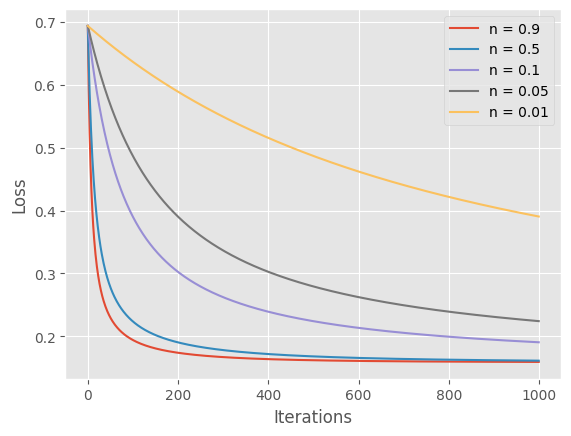

In [16]:
plt.style.use("ggplot")
plt.plot(gdlogr09.epochs,gdlogr09.train_loss, label = "n = 0.9")
plt.plot(gdlogr05.epochs,gdlogr05.train_loss, label = "n = 0.5")
plt.plot(gdlogr01.epochs,gdlogr01.train_loss, label = "n = 0.1")
plt.plot(gdlogr005.epochs,gdlogr005.train_loss, label = "n = 0.05")
plt.plot(gdlogr001.epochs,gdlogr001.train_loss, label = "n = 0.01")
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.legend()
plt.show()

#### Test Loss

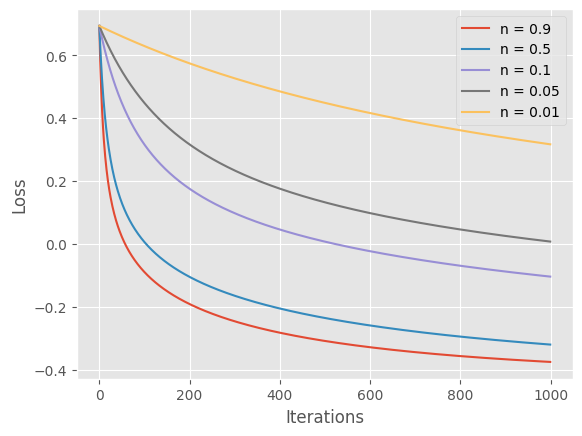

In [17]:
plt.style.use("ggplot")
plt.plot(gdlogr09.epochs,gdlogr09.test_loss, label = "n = 0.9")
plt.plot(gdlogr05.epochs,gdlogr05.test_loss, label = "n = 0.5")
plt.plot(gdlogr01.epochs,gdlogr01.test_loss, label = "n = 0.1")
plt.plot(gdlogr005.epochs,gdlogr005.test_loss, label = "n = 0.05")
plt.plot(gdlogr001.epochs,gdlogr001.test_loss, label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

The conclusion that we might draw from the graphs above is similar to that in the previous question. A learning rate of around 0.1-0.5 performs the best among our tests.

#### **Contour Plot**

We now examine the effect of intial values on our gradient descent algorithm by plotting the contour plot and our gradient descent path for various intial w0 and w1.

Data

In [18]:
cdg00 = GD_LogR(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = GD_LogR(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg11 = GD_LogR(w0 = 1,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg22 = GD_LogR(w0 = -2,w1 = -2,learn_rate = 0.01,iterations = 1000)

cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg11.fit(xs,ys)
cdg22.fit(xs,ys)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# define cost function
def cost(w0,w1,xs,ys):

    y_pred = sigmoid(w0 + w1*xs)

    logPred = np.log(y_pred)
    logOneMinusPred = np.log(1-y_pred)
    return -1/len(y_pred)*np.sum(((ys*logPred) + (1-ys)*(logOneMinusPred)))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*cdg00.w0,5*cdg00.w0,100)
w1vals = np.linspace(-5*cdg00.w1,5*cdg00.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

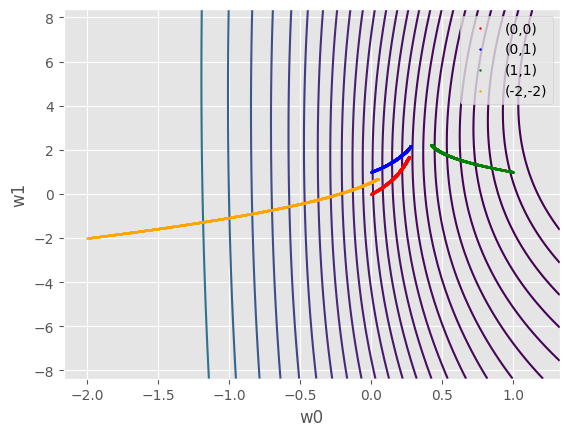

In [19]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-1,1,30))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg11.l_w0, cdg11.l_w1, '+',color = "green",markersize = 2, label = "(1,1)")
plt.plot(cdg22.l_w0, cdg22.l_w1, '+',color = "orange",markersize = 2, label = "(-2,-2)")
plt.legend()
plt.show()

Though this surface isn't visuallized as nice as the others, due to the log property, we can still see that all of our methods converge fairly well regardless of their initial data. 

#### **Sample Size Effect**

Finally, we examine the effect of sample size on the quality of our regression. We'll use a starting value of (0,0), a learning rate of 0.1 and 100 iterations to test

In [20]:
xs10,ys10 = sample(F,10)
xs50,ys50 = sample(F,50)
xs100,ys100 = sample(F,100)
xs200,ys200 = sample(F,200)
xs500,ys500 = sample(F,500)

gd10 = GD_LogR(0,0,0.1,100)
gd10.fit(xs10,ys10)

gd50 = GD_LogR(0,0,0.1,100)
gd50.fit(xs50,ys50)

gd100 = GD_LogR(0,0,0.1,100)
gd100.fit(xs100,ys100)

gd200 = GD_LogR(0,0,0.1,100)
gd200.fit(xs200,ys200)

gd500 = GD_LogR(0,0,0.1,100)
gd500.fit(xs500,ys500)

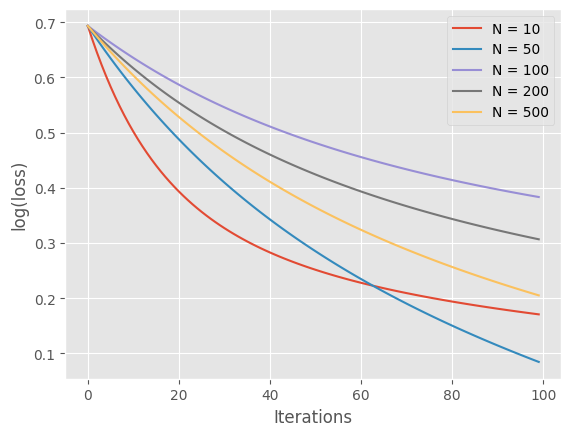

In [21]:
plt.style.use("ggplot")
plt.plot(gd10.epochs,gd10.train_loss, label = "N = 10")
plt.plot(gd50.epochs,gd50.train_loss, label = "N = 50")
plt.plot(gd100.epochs,gd100.train_loss, label = "N = 100")
plt.plot(gd200.epochs,gd200.train_loss, label = "N = 200")
plt.plot(gd500.epochs,gd500.train_loss, label = "N = 500")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

We see different results compared to our previous regression here. We see that our regression actually performs worse with higher number of values here and better at N = 10 or N = 50. Suprisingly, however, this graph suggest that our algorithm performs better on 500 datapoints that 100 or 200 data points, which is not what we saw with simple linear regression.

## **Question 3)**

We now perform the same analysis as the previous question but with varying methods of gradient descent. Specifically, we examine Stochastic Gradient Descent and Momentum Gradient Descent. We will use the original function provided in question 1, along with traditional linear regression in our analysis. 

#### **Class Definition: Linear Regression with Stochastic Gradient Descent**

In [23]:
class SGD:

    def __init__(self,w0,w1,learn_rate,iterations):

        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]

        self.learn_rate = learn_rate
        self.iterations = iterations

        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    def loss(self,y,y_pred):
        return np.sum(np.square(y - y_pred)) / (2*len(y))

    def fit(self,xs,ys):

        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]


        n = len(xs)
        
        # perform Stochastic Gradient Descent

        """ 
        Note I opted here for another variant of stochastic gradient descent.
        Instead of randomizing and running through for each epoch, we randomly select a value
        and then update based on that. This made it easier to graph cost vs iterations and gives a 
        clear representation of whats going on.
        """
        for i in range(self.iterations):

            index = np.random.randint(0,len(xs)-1)
            x = xs[index]
            y = ys[index]

            # predict y-values
            y_pred = self.w0 + self.w1*xs
            y_hat = self.w0 + self.w1*x

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
                
            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = (y-y_hat)
            w1_deriv = x*(y - y_hat)
                
            # update values
            self.w0 = self.w0 + self.learn_rate*w0_deriv
            self.w1 = self.w1 + self.learn_rate*w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

### **Testing**

Below we intialize the testing data that will be used throughout the section. Please not that I have set the random seed to 1 for consistency in commentary and results.

In [24]:
# target function
def F(x): 
    return np.exp(x)

# Sample Values
xs,ys = sample(F,100,1)

#### **Error Plots**

In [25]:
# n = 0.9
sgdlr09 = SGD(0,0,0.9,1000)
sgdlr09.fit(xs,ys)

# n = 0.5
sgdlr05 = SGD(0,0,0.5,1000)
sgdlr05.fit(xs,ys)

# n = 0.1
sgdlr01 = SGD(0,0,0.1,1000)
sgdlr01.fit(xs,ys)

# n = 0.05
sgdlr005 = SGD(0,0,0.05,1000)
sgdlr005.fit(xs,ys)

# n = 0.01
sgdlr001 = SGD(0,0,0.01,1000)
sgdlr001.fit(xs,ys)

#### Training Loss

Note I've plotted learning rate of 0.9 and 0.5 seperately from the others, as they perform very poorly and distort the graph. I still felt it was important to include as a notable result.

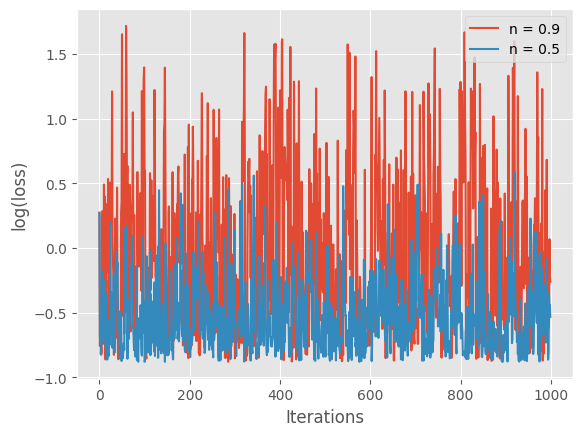

In [26]:
plt.style.use("ggplot")
plt.plot(sgdlr09.epochs,np.log(sgdlr09.train_loss), label = "n = 0.9")
plt.plot(sgdlr05.epochs,np.log(sgdlr05.train_loss), label = "n = 0.5")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

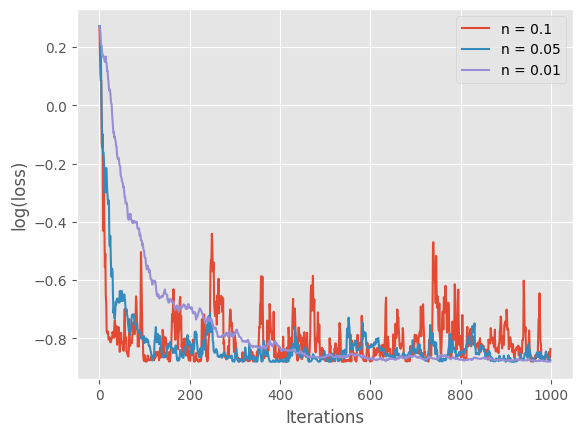

In [27]:
plt.style.use("ggplot")
plt.plot(sgdlr01.epochs,np.log(sgdlr01.train_loss), label = "n = 0.1")
plt.plot(sgdlr005.epochs,np.log(sgdlr005.train_loss), label = "n = 0.05")
plt.plot(sgdlr001.epochs,np.log(sgdlr001.train_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

#### Test Loss

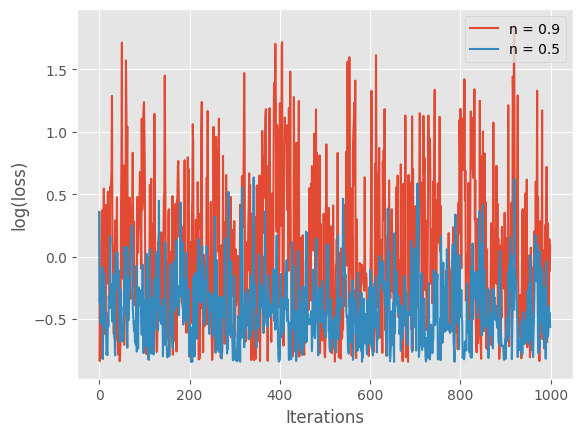

In [28]:
plt.style.use("ggplot")
plt.plot(sgdlr09.epochs,np.log(sgdlr09.test_loss), label = "n = 0.9")
plt.plot(sgdlr05.epochs,np.log(sgdlr05.test_loss), label = "n = 0.5")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

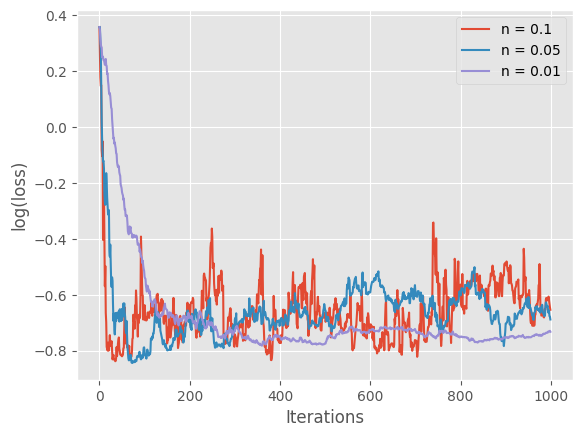

In [29]:
plt.style.use("ggplot")
plt.plot(sgdlr01.epochs,np.log(sgdlr01.test_loss), label = "n = 0.1")
plt.plot(sgdlr005.epochs,np.log(sgdlr005.test_loss), label = "n = 0.05")
plt.plot(sgdlr001.epochs,np.log(sgdlr001.test_loss), label = "n = 0.01")
plt.xlabel("Iterations")
plt.ylabel("log(loss)")
plt.legend()
plt.show()

From the above graphs, we might suggest that a learning rate near 0.01 performs the best for our gradient descent algorithm.  

#### **Contour Plot**

For this analysis, we'll use a learning rate of 0.01, 1000 samples and 1000 iterations.

Data

In [30]:
# intialize different starting values
cdg00 = SGD(w0 = 0,w1 = 0,learn_rate = 0.01,iterations = 1000)
cdg01 = SGD(w0 = 0,w1 = 1,learn_rate = 0.01,iterations = 1000)
cdg55 = SGD(w0 = 5,w1 = 5,learn_rate = 0.01,iterations = 1000)
cdg44 = SGD(w0 = -4,w1 = -4,learn_rate = 0.01,iterations = 1000)

# fit regressions
cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*sgdlr001.w0,5*sgdlr001.w0,100)
w1vals = np.linspace(-5*sgdlr001.w1,5*sgdlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

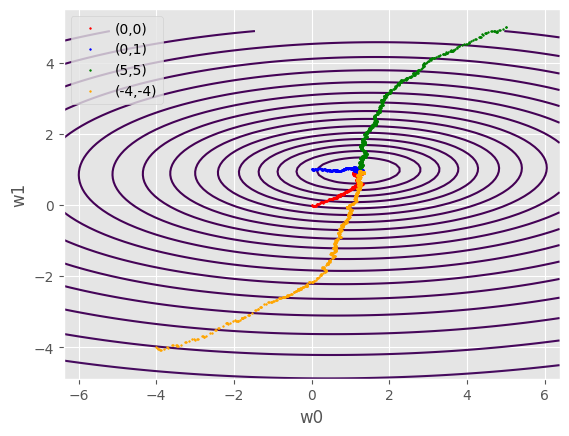

In [31]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "(0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "(0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "(5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "(-4,-4)")
plt.legend()
plt.show()

Again we see that a the intial conditions do not have to big of an effect on our gradient descent algorithm.

#### **Class Definition: Linear Regression with Momentum Gradient Descent**

In [32]:
class SGD_MOM:

    def __init__(self,w0,w1,learn_rate,decay,iterations):
        
        self.w0 = w0
        self.w1 = w1
        self.l_w0 = [w0]
        self.l_w1 = [w1]

        self.prevw0 = 0
        self.prevw1 = 0

        self.learn_rate = learn_rate
        self.decay = decay
        self.iterations = iterations
        self.train_loss = list()
        self.test_loss = list()
        self.epochs = list()

    def loss(self,y,y_pred):
        # calculate the loss on between predicted and true values.
        return np.sum(np.square(y - y_pred)) / (2*len(y))
    
    def fit(self,xs,ys):

        # split training and testing data
        splitval = int(len(xs)*0.8)
        xs_test = xs[splitval:]
        xs = xs[:splitval]

        ys_test = ys[splitval:]
        ys = ys[:splitval]
        
        
        # Perform Stochastic Gradient Descent with Momentum Added
        """ 
        Note I opted here for another variant of stochastic gradient descent.
        Instead of randomizing and running through for each epoch, we randomly select a value
        and then update based on that. This made it easier to graph cost vs iterations and gives a 
        clear representation of whats going on.
        """
        for i in range(self.iterations):

            index = np.random.randint(0,len(xs)-1)
            x = xs[index]
            y = ys[index]

            # predict y-values
            y_pred = self.w0 + self.w1*xs
            y_hat = self.w0 + self.w1*x

            # calculate loss

            # train loss
            cost = self.loss(ys,y_pred)
            self.train_loss.append(cost)

            # test loss
            cost = self.loss(ys_test,self.w0 + self.w1*xs_test)
            self.test_loss.append(cost)
                
            self.epochs.append(i)

            # calcualte gradients
            w0_deriv = self.decay*self.prevw0 - self.learn_rate*(y-y_hat)
            w1_deriv = self.decay*self.prevw1 - self.learn_rate*(y - y_hat)*x
                
            # update values
            self.w0 = self.w0 - w0_deriv
            self.w1 = self.w1 - w1_deriv

            self.prevw0 = w0_deriv
            self.prevw1 = w1_deriv

            self.l_w0.append(self.w0)
            self.l_w1.append(self.w1)

#### **Error Plots**

Note that we will use a decay rate of 0.9 throughout the testing. After doing some reading, this is a commonly agreed upon value for the decay rate.

In [33]:
# target function
def F(x): 
    return np.exp(x)

# Sample Values
xs,ys = sample(F,100,1)

In [34]:
# n = 0.9
sgdmlr09 = SGD_MOM(0,0,0.9,0.9,1000)
sgdmlr09.fit(xs,ys)

# n = 0.5
sgdmlr05 = SGD_MOM(0,0,0.5,0.9,1000)
sgdmlr05.fit(xs,ys)

# n = 0.1
sgdmlr01 = SGD_MOM(0,0,0.1,0.9,1000)
sgdmlr01.fit(xs,ys)

# n = 0.05
sgdmlr005 = SGD_MOM(0,0,0.05,0.9,1000)
sgdmlr005.fit(xs,ys)

# n = 0.01
sgdmlr001 = SGD_MOM(0,0,0.01,0.9,1000)
sgdmlr001.fit(xs,ys)

#### Training Loss

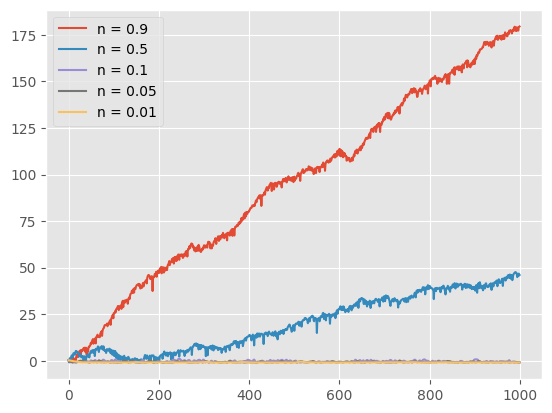

In [35]:
plt.style.use("ggplot")
plt.plot(sgdmlr09.epochs,np.log(sgdmlr09.train_loss), label = "n = 0.9")
plt.plot(sgdmlr05.epochs,np.log(sgdmlr05.train_loss), label = "n = 0.5")
plt.plot(sgdmlr01.epochs,np.log(sgdmlr01.train_loss), label = "n = 0.1")
plt.plot(sgdmlr005.epochs,np.log(sgdmlr005.train_loss), label = "n = 0.05")
plt.plot(sgdmlr001.epochs,np.log(sgdmlr001.train_loss), label = "n = 0.01")
plt.legend()
plt.show()

#### Test Loss

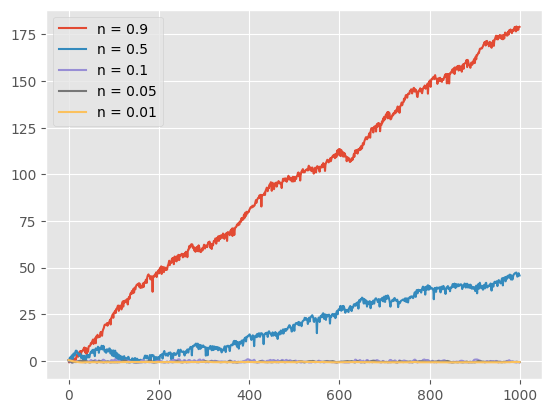

In [36]:
plt.style.use("ggplot")
plt.plot(sgdmlr09.epochs,np.log(sgdmlr09.test_loss), label = "n = 0.9")
plt.plot(sgdmlr05.epochs,np.log(sgdmlr05.test_loss), label = "n = 0.5")
plt.plot(sgdmlr01.epochs,np.log(sgdmlr01.test_loss), label = "n = 0.1")
plt.plot(sgdmlr005.epochs,np.log(sgdmlr005.test_loss), label = "n = 0.05")
plt.plot(sgdmlr001.epochs,np.log(sgdmlr001.test_loss), label = "n = 0.01")
plt.legend()
plt.show()

Again, similar to what we saw under stochastic gradient descent, these graphs suggest that a learning rate of around 0.01 would be suitable for this algorithm.

#### **Contour Plot**

Data

In [37]:
cdg00 = SGD_MOM(w0 = 0,w1 = 0,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg01 = SGD_MOM(w0 = 0,w1 = 1,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg55 = SGD_MOM(w0 = 5,w1 = 5,learn_rate = 0.01,decay = 0.9,iterations = 100)
cdg44 = SGD_MOM(w0 = -4,w1 = -4,learn_rate = 0.01,decay = 0.9,iterations = 100)

cdg00.fit(xs,ys)
cdg01.fit(xs,ys)
cdg55.fit(xs,ys)
cdg44.fit(xs,ys)

# define cost function
def cost(w0,w1,xs,ys):
    y_pred = w0 + w1*xs
    return np.sum((ys - y_pred)**2) / (2*len(ys))

# get final values from first iteration to create grid
w0vals = np.linspace(-5*sgdmlr001.w0,5*sgdmlr001.w0,100)
w1vals = np.linspace(-5*sgdmlr001.w1,5*sgdmlr001.w1,100)
cost_vals = np.zeros((len(w0vals), len(w1vals)))

# get cost values over grid
c1=0; c2=0
for i in w0vals:
    for j in w1vals:
        cost_vals[c1][c2] = cost(i,j,xs,ys)
        c2=c2+1
    c1=c1+1
    c2=0

Plot

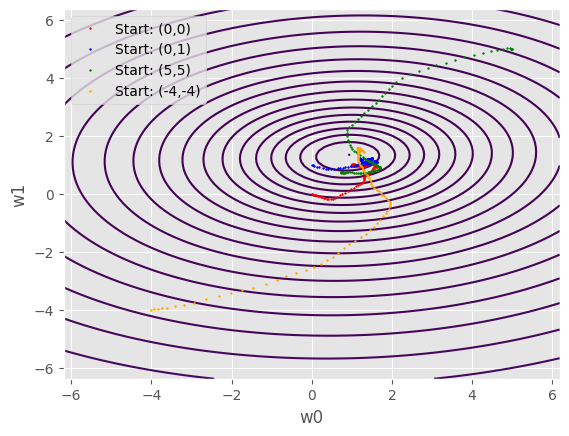

In [38]:
plt.style.use("ggplot")
plt.contour(w0vals, w1vals, cost_vals,levels = np.logspace(-2,3,50))
plt.xlabel('w0'); plt.ylabel("w1")
plt.plot(cdg00.l_w0, cdg00.l_w1, '+',color = "red",markersize = 2,label = "Start: (0,0)")
plt.plot(cdg01.l_w0, cdg01.l_w1, '+',color = "blue",markersize = 2, label = "Start: (0,1)")
plt.plot(cdg55.l_w0, cdg55.l_w1, '+',color = "green",markersize = 2, label = "Start: (5,5)")
plt.plot(cdg44.l_w0, cdg44.l_w1, '+',color = "orange",markersize = 2, label = "Start: (-4,-4)")
plt.legend()
plt.show()

We see that the initial conditions under momentum do play a role in how our function converges to the minimum. We see that initial conditions that start far away such as (5,5) take a round about way before approaching the minimum.

## **Question 4)**

In this question, we implement a 2 layer neural network and examine its behaviour under varying parameters such as, the activiation function, the target function, the width of the hidden layer, and the size of the training set.

#### **Class Definition: 2-Layer Neural Network**

In [39]:
class NeuralNetwork:

    def __init__(self,n_input = 1, n_hidden = 2, n_output = 1,learn_rate = 0.01, iterations = 1000,activation = "s", method = "p",seed = 1):
        
        # intialize parameters
        self.seed = seed

        # my parameters, weights and biases
        self.p = dict()

        # neural network parameters
        self.learn_rate = learn_rate
        self.iterations = iterations
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.activation = activation
        
        self.xs = None
        self.ys = None
    
        # initialize cost
        self.train_costs = []
        self.epochs = []


    def start_weights(self):
        np.random.seed(self.seed)

        # generate weights and bias for first layer
        self.p['w1'] = np.random.randn(self.n_hidden,self.n_input)
        self.p['b1'] = np.random.randn(self.n_hidden,1)

        # generate weights and bias for second layer
        self.p['w2'] = np.random.randn(1,self.n_hidden)
        self.p['b2'] = np.random.randn(1,1)

    
    # define all my activation functions

    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def dsigmoid(self,x):
        return self.sigmoid(x)*(1 - self.sigmoid(x))

    def ReLu(self,x):
        return (x + np.abs(x)) / 2

    def dReLu(self,x):
        return x > 0
    
    def tanh(self,x):
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    
    def dtanh(self,x):
        return 1 - np.power(self.tanh(x),2)
    
    # define cost
    def loss(self,y,y_hat):
        return np.sum(np.square(y - y_hat)) / (2*len(y))

    def getActivationFunc(self):

        if (self.activation == "s"):
            return self.sigmoid
        
        if (self.activation == "r"):
            return self.ReLu
        
        if (self.activation == "t"):
            return self.tanh
        
    def getActivationFuncD(self):
        if (self.activation == "s"):
            return self.dsigmoid
        
        if (self.activation == "r"):
            return self.dReLu
        
        if (self.activation == "t"):
            return self.dtanh


    def forward_prop(self):
        
        # get activation function
        a = self.getActivationFunc()
        
        # forward propogate values on training data
        z1 = np.dot(self.p['w1'],self.xs) + self.p['b1']
        a1 = a(z1)
    
        z2 = np.dot(self.p['w2'],a1) + self.p['b2']
        y_pred = z2
       
        # get cost
        train_cost = self.loss(self.ys,y_pred)
    
        
        # update parameters
        self.p['z1'] = z1
        self.p['z2'] = z2
        self.p['a1'] = a1

        return y_pred,train_cost

    def back_prop(self,y_pred):

        # get activation function and its derivative
        ad = self.getActivationFuncD()


        # back propogate output layer
        d2 = np.sum((y_pred - self.ys))/ len(self.ys)
        
        d1 = d2*self.p['w2'].T*ad(self.p['z1'])

        # calculate partial derivatives
        dw2 = d2*self.p['a1'].T
        db2 = d2

        dw1 = d1.dot(self.xs.T)
        db1 = d1


        # update first weights layer + bias
        self.p['w1'] = self.p['w1'] - self.learn_rate*dw1
        self.p['b1'] = self.p['b1'] - self.learn_rate*db1

        # update second layer weights + bias
        self.p['w2'] = self.p['w2'] - self.learn_rate*dw2
        self.p['b2'] = self.p['b2'] - self.learn_rate*db2


    def fit(self,X,Y):

        self.start_weights()
        
        self.xs = X.reshape(X.shape[0],1)

        self.ys = Y.reshape(Y.shape[0],1)

        for i in range(self.iterations):

            # do forwad propogation
            y_pred, train_cost = self.forward_prop()

            # do back propogation and gradient descent
            self.back_prop(y_pred)

            # store costs
            self.train_costs.append(train_cost)
            self.epochs.append(i)        

### **Testing**

As before, we initialize some testing data for the various functions. There functions below are those that we will be testing on.

In [40]:
def F1(x):
    return np.exp(x)

def F2(x):
    return np.sin(30*x) + np.cos(27*x)

def F3(x):
    return np.sin(1 / (1.02 - x))

#### **Width of Hidden Layer**

In the below, we will test the effect that the hidden layer has on each of the above functions. We do this with a static activation functoin, the sigmoid function, and static training size of 100 for 100 iterations.

##### Function 1

In [41]:
xs,ys = sample(F1,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 1, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn10 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn10.fit(xs,ys)
nn50 = NeuralNetwork(n_input = 100, n_hidden = 50, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn50.fit(xs,ys)
nn75 = NeuralNetwork(n_input = 100, n_hidden = 75, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn75.fit(xs,ys)

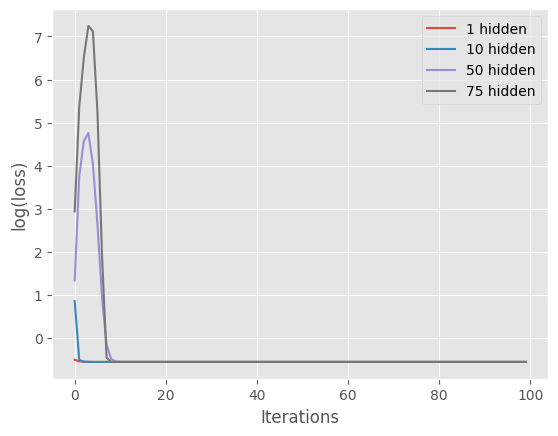

In [42]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "1 hidden")
plt.plot(nn10.epochs,np.log(nn10.train_costs), label = "10 hidden")
plt.plot(nn50.epochs,np.log(nn50.train_costs), label = "50 hidden")
plt.plot(nn75.epochs,np.log(nn75.train_costs), label = "75 hidden")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

From this plot, we can certainly see that for the first function, a lower number of hidden nodes performs much better, between 1 and 10. That said, their costs still converge to around the same values after a few iterations.

##### Function 2

In [43]:
xs,ys = sample(F2,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 1, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn10 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn10.fit(xs,ys)
nn50 = NeuralNetwork(n_input = 100, n_hidden = 50, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn50.fit(xs,ys)
nn75 = NeuralNetwork(n_input = 100, n_hidden = 75, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn75.fit(xs,ys)

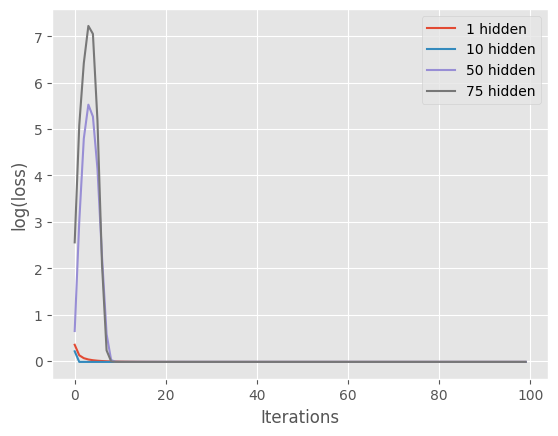

In [44]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "1 hidden")
plt.plot(nn10.epochs,np.log(nn10.train_costs), label = "10 hidden")
plt.plot(nn50.epochs,np.log(nn50.train_costs), label = "50 hidden")
plt.plot(nn75.epochs,np.log(nn75.train_costs), label = "75 hidden")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

We see similar results for function 2. That said, the difference can be see at the lower number of hidden neurons. In this case, we might opt to choose about 10 hidden neurons.

##### Function 3

In [45]:
xs,ys = sample(F3,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 1, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn10 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn10.fit(xs,ys)
nn50 = NeuralNetwork(n_input = 100, n_hidden = 50, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn50.fit(xs,ys)
nn75 = NeuralNetwork(n_input = 100, n_hidden = 75, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn75.fit(xs,ys)

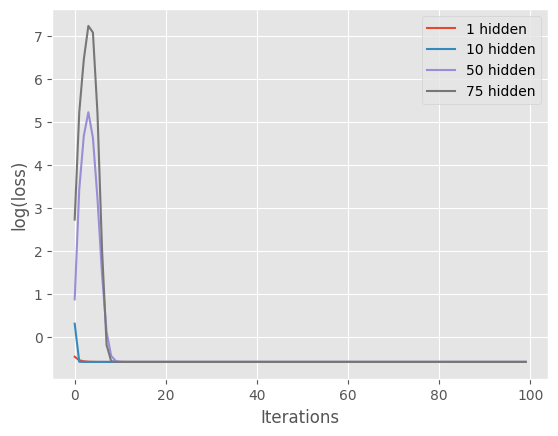

In [46]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "1 hidden")
plt.plot(nn10.epochs,np.log(nn10.train_costs), label = "10 hidden")
plt.plot(nn50.epochs,np.log(nn50.train_costs), label = "50 hidden")
plt.plot(nn75.epochs,np.log(nn75.train_costs), label = "75 hidden")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

For Function 3, it seems to peform similar to function 1. Thus we migth choose to take around 10 neurons in our hidden layer.

### **Activation Function**

We will now examine how the choice of activation function impact the performance of our network. The activation functions I have implemented are logistic, tanh and ReLU. We will use the number of hidden neurons as we found in the previous tests.

##### Function 1

In [47]:
xs,ys = sample(F1,100)
nns = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nns.fit(xs,ys)
nnt= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "t", method = "t",seed = 1)
nnt.fit(xs,ys)
nnr = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "r", method = "t",seed = 1)
nnr.fit(xs,ys)

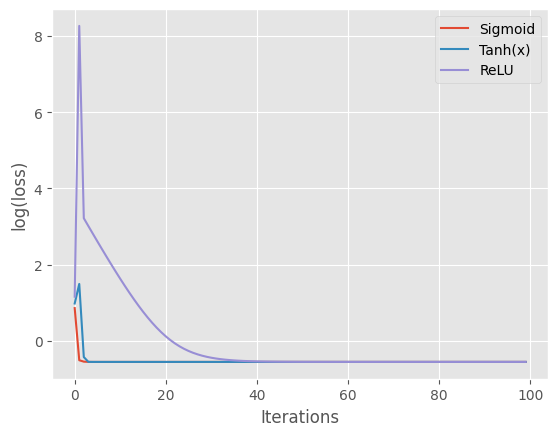

In [48]:
plt.style.use("ggplot")
plt.plot(nns.epochs,np.log(nns.train_costs), label = "Sigmoid")
plt.plot(nnt.epochs,np.log(nnt.train_costs), label = "Tanh(x)")
plt.plot(nnr.epochs,np.log(nnr.train_costs), label = "ReLU")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

From these graphs, it sees that the logistic function performs best for Function 1. 

##### Function 2

In [49]:
xs,ys = sample(F2,100)
nns = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nns.fit(xs,ys)
nnt= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "t", method = "t",seed = 1)
nnt.fit(xs,ys)
nnr = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "r", method = "t",seed = 1)
nnr.fit(xs,ys)

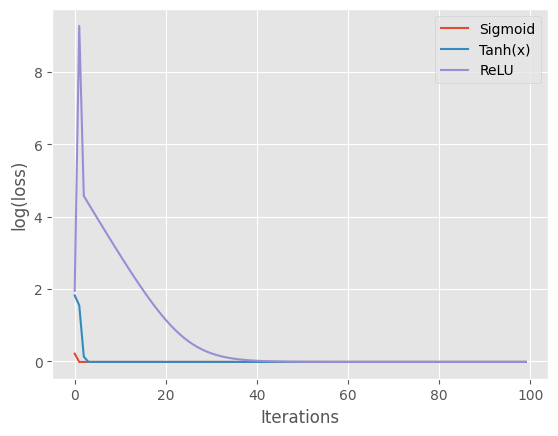

In [50]:
plt.style.use("ggplot")
plt.plot(nns.epochs,np.log(nns.train_costs), label = "Sigmoid")
plt.plot(nnt.epochs,np.log(nnt.train_costs), label = "Tanh(x)")
plt.plot(nnr.epochs,np.log(nnr.train_costs), label = "ReLU")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

Again for Function 2, the graph above suggests that the sigmoid function performs best as the activation function on our network.

##### Function 3

In [51]:
xs,ys = sample(F3,100)
nns = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nns.fit(xs,ys)
nnt= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "t", method = "t",seed = 1)
nnt.fit(xs,ys)
nnr = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "r", method = "t",seed = 1)
nnr.fit(xs,ys)

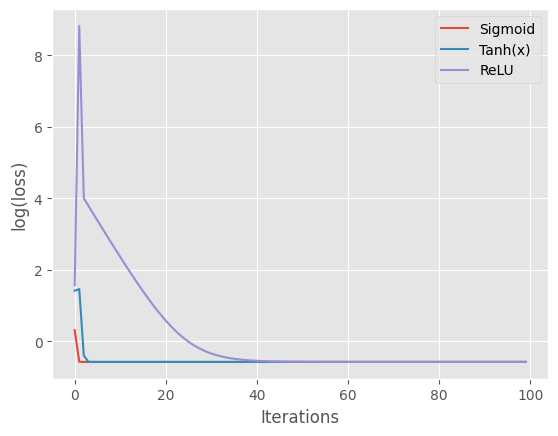

In [52]:
plt.style.use("ggplot")
plt.plot(nns.epochs,np.log(nns.train_costs), label = "Sigmoid")
plt.plot(nnt.epochs,np.log(nnt.train_costs), label = "Tanh(x)")
plt.plot(nnr.epochs,np.log(nnr.train_costs), label = "ReLU")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

Finally, again the graph suggests that sigmoid as our activation function performs the best.

##### **Remark on Activation Functions**

Based on the extra readings I had done, it was quite suprising that the logistic function appeared to perform the best on all of the functions provided. Some articles suggested using tanh(x) as an activation function as it has stronger properties than the logistic function and hence would perform better under certain scenarios. Finally, I also would have expected the ReLU function to have peformed between as it is ccertainly the most commonly applied activation function in the articles/texts that I read.

### **Training Parameters**

We now look at the effect of the learning rate on each of our functions. We will use learning rates of 0.1, 0.01 and 0.05 to test, as these were the values we found performed best earlier in this lab. Again, we use the results from the previous tests as static in this test.

##### Function 1

In [53]:
xs,ys = sample(F1,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn5= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.05, iterations = 100,activation = "s", method = "t",seed = 1)
nn5.fit(xs,ys)
nn01 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.01, iterations = 100,activation = "s", method = "t",seed = 1)
nn01.fit(xs,ys)

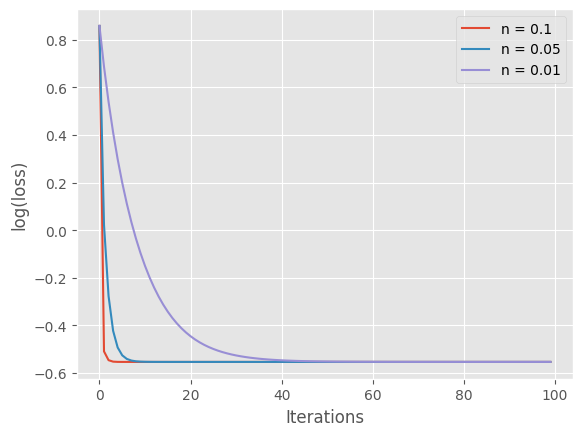

In [54]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "n = 0.1")
plt.plot(nn5.epochs,np.log(nn5.train_costs), label = "n = 0.05")
plt.plot(nn01.epochs,np.log(nn01.train_costs), label = "n = 0.01")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

For Function 1, we find that a learning rate parameter of 0.1 peforms the best on our network.

##### Function 2

In [ ]:
xs,ys = sample(F2,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn5= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.05, iterations = 100,activation = "s", method = "t",seed = 1)
nn5.fit(xs,ys)
nn01 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.01, iterations = 100,activation = "s", method = "t",seed = 1)
nn01.fit(xs,ys)

In [ ]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "n = 0.1")
plt.plot(nn5.epochs,np.log(nn5.train_costs), label = "n = 0.05")
plt.plot(nn01.epochs,np.log(nn01.train_costs), label = "n = 0.01")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

For Function 2, we see a much less exagerated difference between the 0.1 values and the 0.05 values. Thus we might suggest choosing a learning rate between 0.1 and 0.05.

##### Function 3

In [ ]:
xs,ys = sample(F3,100)
nn1 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1.fit(xs,ys)
nn5= NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.05, iterations = 100,activation = "s", method = "t",seed = 1)
nn5.fit(xs,ys)
nn01 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.01, iterations = 100,activation = "s", method = "t",seed = 1)
nn01.fit(xs,ys)

In [ ]:
plt.style.use("ggplot")
plt.plot(nn1.epochs,np.log(nn1.train_costs), label = "n = 0.1")
plt.plot(nn5.epochs,np.log(nn5.train_costs), label = "n = 0.05")
plt.plot(nn01.epochs,np.log(nn01.train_costs), label = "n = 0.01")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

We see a similar story here in Function 3. Again this graph would suggest that choosing learning rate between 0.1 and 0.05 would perform the best.

### **Training Size**

In this section we will now use the parameters that we previously thought to be suitable for each function and test them on varying sizes of our data.

##### Function 1

In [ ]:
xs,ys = sample(F1,100)
nn100 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn100.fit(xs,ys)

xs,ys = sample(F1,500)
nn500= NeuralNetwork(n_input = 500, n_hidden = 10, n_output = 500,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn500.fit(xs,ys)

xs,ys = sample(F1,1000)
nn1000 = NeuralNetwork(n_input = 1000, n_hidden = 10, n_output = 1000,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1000.fit(xs,ys)

In [ ]:
plt.style.use("ggplot")
plt.plot(nn100.epochs,np.log(nn100.train_costs), label = "N = 100")
plt.plot(nn500.epochs,np.log(nn500.train_costs), label = "N = 200")
plt.plot(nn1000.epochs,np.log(nn1000.train_costs), label = "N = 1000")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

From the graph above, we can see that a lower training size has a positive effect on our network. We can see that the training size of 100 performs the best, while the training sizes of 200 and 1000 peform essentially the same in terms of cost.

##### Function 2

In [ ]:
xs,ys = sample(F2,100)
nn100 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn100.fit(xs,ys)

xs,ys = sample(F2,500)
nn500= NeuralNetwork(n_input = 500, n_hidden = 10, n_output = 500,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn500.fit(xs,ys)

xs,ys = sample(F2,1000)
nn1000 = NeuralNetwork(n_input = 1000, n_hidden = 10, n_output = 1000,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1000.fit(xs,ys)

In [ ]:
plt.style.use("ggplot")
plt.plot(nn100.epochs,np.log(nn100.train_costs), label = "N = 100")
plt.plot(nn500.epochs,np.log(nn500.train_costs), label = "N = 200")
plt.plot(nn1000.epochs,np.log(nn1000.train_costs), label = "N = 1000")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

For Function 2, we do see a difference between the 200 and 1000 sample sizes. That said, a sample size of 100 seems to peform the best here again.

##### Function 3

In [ ]:
xs,ys = sample(F3,100)
nn100 = NeuralNetwork(n_input = 100, n_hidden = 10, n_output = 100,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn100.fit(xs,ys)

xs,ys = sample(F3,500)
nn500= NeuralNetwork(n_input = 500, n_hidden = 10, n_output = 500,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn500.fit(xs,ys)

xs,ys = sample(F3,1000)
nn1000 = NeuralNetwork(n_input = 1000, n_hidden = 10, n_output = 1000,learn_rate = 0.1, iterations = 100,activation = "s", method = "t",seed = 1)
nn1000.fit(xs,ys)

In [ ]:
plt.style.use("ggplot")
plt.plot(nn100.epochs,np.log(nn100.train_costs), label = "N = 100")
plt.plot(nn500.epochs,np.log(nn500.train_costs), label = "N = 200")
plt.plot(nn1000.epochs,np.log(nn1000.train_costs), label = "N = 1000")
plt.ylabel("log(loss)")
plt.xlabel("Iterations")
plt.legend()
plt.show()

Lastly, for Function 3, we see that similarily to Function 1 the 200 and 1000 sample sizes peform roughly the same but the 100 sample size performs the best.

### **Summary of Section**

In this section, we examined the various parameters that are associated with a 2 layer neural network, such as the width of the hidden layer, the activation function, the learning rate and finally the size of the training set. We examined all of these factors in relation to the three functions provided and suggest "optimal" parameters for each based on our testing.